In [92]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt


device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [93]:
train=torchvision.datasets.MNIST(root='./data' , train = True, transform= torchvision.transforms.ToTensor(), download=True)
test=torchvision.datasets.MNIST(root='./data' , train = False, transform= torchvision.transforms.ToTensor())

In [94]:
inp_size=28*28
num_echos=2
hidden_layers=100
batch_size=100
num_classes=10
l_rate=0.001

In [95]:
train_loader=torch.utils.data.DataLoader(dataset=train,batch_size=batch_size,shuffle=True,)
test_loader=torch.utils.data.DataLoader(dataset=test,batch_size=batch_size,)

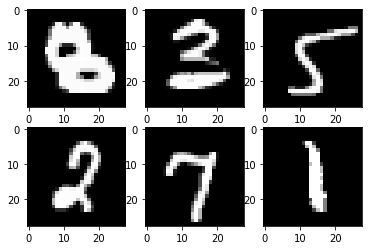

In [96]:
examples= iter(train_loader)
samples,labels=next(examples)
# print(samples.shape,labels.shape)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')

# plt.show()


In [97]:
class FeedForwardNN(torch.nn.Module):
    def __init__(self,inp_size,hidden_layers,num_classes):
        super(FeedForwardNN,self).__init__()
        self.l1=torch.nn.Linear(inp_size,hidden_layers)
        self.relu=torch.nn.ReLU()
        self.l2=torch.nn.Linear(hidden_layers,num_classes)
    
    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out
    

In [98]:
model= FeedForwardNN(inp_size,hidden_layers,num_classes)
loss=torch.nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=l_rate)

In [99]:
num_iters=len(train_loader)
for eco in range(num_echos):
    for i,(sample,labels) in enumerate(train_loader):
        sample=sample.reshape(-1,28*28).to(device)
        labels=labels.to(device)
        y_hat=model(sample)
        l=loss(y_hat,labels)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        if(i%100==0):print(f'{i+1}:loss={l}')

1:loss=2.3088817596435547
101:loss=0.38476771116256714
201:loss=0.48295679688453674
301:loss=0.4160606265068054
401:loss=0.34821251034736633
501:loss=0.2606726586818695
1:loss=0.19664832949638367
101:loss=0.2538554072380066
201:loss=0.09916947036981583
301:loss=0.17886434495449066
401:loss=0.16569554805755615
501:loss=0.18496514856815338


In [101]:
with torch.no_grad():
    total=0
    correct=0
    for image,label in test_loader:
        image=image.reshape(-1,28*28).to(device)
        label=label.to(device)
        out=model(image)
        _,pred=torch.max(out,1)
        total+=label.shape[0]
        # print(pred,label)
        correct+=(pred==label).sum().item()
    print(f'Accuracy={correct/total*100}')

Accuracy=95.1
